In [66]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [68]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [69]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="Ayutthaya",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,3069,471,70294,2030,254,1566,16137,1392,655,472,...,48.223830,37.278020,59467272,0.11918,12393.628934,1.141681e+06,205980,8723,178,143862.554
1996,3305,513,80942,2290,324,5205,19161,1626,819,595,...,45.255728,37.081286,60130190,0.11918,13253.421437,1.144784e+06,297246,8723,172,171503.917
1997,4056,474,86917,2697,382,1756,20641,2219,675,575,...,46.814732,36.564600,60846588,0.10214,13493.539750,1.145651e+06,322734,8723,170,179223.451
1998,4805,395,84878,3388,420,1166,22362,2306,666,585,...,42.303171,36.111727,61585103,0.17525,13536.724929,1.145807e+06,327318,10418,170,180611.806
1999,4030,302,92332,2974,503,1397,22431,2483,685,836,...,44.267746,36.378900,62298569,0.24836,13824.290188,1.146844e+06,357842,21707,168,189856.706


In [70]:
df.shape

(24, 31)

In [71]:
df.columns

Index(['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
       'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
       'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
       'มูลค่าเพิ่มของ

## Regression before Feature Selection

In [72]:
input_vars = ['Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities',
       'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
       'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
       'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
       'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
       'จำนวนประชากรทั้งหมด (คน)',
       'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)',
       'รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท)',
       'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
       'จำนวนนักท่องเที่ยวชาวไทย (คน)', 'จำนวนนักท่องเที่ยวชาวต่างชาติ (คน)',
       'จำนวนโรงงานอุตสาหกรรม (โรงงาน)',]
len(input_vars)

30

In [73]:
X1 = df[input_vars]
y1 = df['GPP Per capita (Baht)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X1_train, y1_train)
y_pred = lm.predict(X1_test)
#[np.sqrt(metrics.mean_squared_error(y1_test,y_pred)),metrics.r2_score(y1_test,y_pred)]

In [74]:
#dataframe
table1 = pd.DataFrame({'R_square': [metrics.r2_score(y1_test,y_pred)], 'RMSE': [np.sqrt(metrics.mean_squared_error(y1_test,y_pred))]}, index=['Linear'])
table1

,R_square,RMSE
Linear,0.997317,4948.120106


## Filter Methods

#### Low Variance Filtering

In [75]:
df1 = df.copy()
df1.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,3069,471,70294,2030,254,1566,16137,1392,655,472,...,48.223830,37.278020,59467272,0.11918,12393.628934,1.141681e+06,205980,8723,178,143862.554
1996,3305,513,80942,2290,324,5205,19161,1626,819,595,...,45.255728,37.081286,60130190,0.11918,13253.421437,1.144784e+06,297246,8723,172,171503.917
1997,4056,474,86917,2697,382,1756,20641,2219,675,575,...,46.814732,36.564600,60846588,0.10214,13493.539750,1.145651e+06,322734,8723,170,179223.451
1998,4805,395,84878,3388,420,1166,22362,2306,666,585,...,42.303171,36.111727,61585103,0.17525,13536.724929,1.145807e+06,327318,10418,170,180611.806
1999,4030,302,92332,2974,503,1397,22431,2483,685,836,...,44.267746,36.378900,62298569,0.24836,13824.290188,1.146844e+06,357842,21707,168,189856.706


In [76]:
df1.var()

Agriculture, forestry and fishing                                     1.214250e+07
Mining and quarrying                                                  4.678607e+05
Manufacturing                                                         6.057976e+09
Electricity, gas, steam and air conditioning supply                   4.000911e+06
Water supply sewerage, waste management and remediation activities    3.428209e+04
Construction                                                          1.774318e+06
Wholesale and retail trade and repair of motor vehicles               7.279945e+07
Transportation and storage                                            2.360573e+07
Accommodation and food service activities                             7.159928e+05
Information and communication                                         1.847017e+05
Financial and insurance activities                                    5.661816e+06
Real estate activities                                                6.069826e+05
Prof

In [77]:
# After scanning variances from all features above, set minimum variance threshold = 10 
# Note that minimum variance threshold can be set to any value

# Below is to remove features with low variances
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features with variance >= minimum variance threshold

min_var_threshold = 10
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Water supply sewerage, waste management and remediation activities',
 'Construction',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Accommodation and food service activities',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'จำนวนนักท่องเที่ยวชาวไทย (คน)',
 'จำนวนนักท

In [78]:
len(updated_vars)

27

In [79]:
# Above, there are 3 features with variance >= minimum variance threshold
# Create new data frame with these 3 features and 1 output

df2 = df1[updated_vars]
df2['จำนวนประชากรทั้งหมด (คน)']=df1['จำนวนประชากรทั้งหมด (คน)']
df2.head()

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_4606/2432665687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['จำนวนประชากรทั้งหมด (คน)']=df1['จำนวนประชากรทั้งหมด (คน)']


,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,"Arts, entertainment and recreation",Other service activities,การค้าสินค้า (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),จำนวนนักท่องเที่ยวชาวไทย (คน),จำนวนนักท่องเที่ยวชาวต่างชาติ (คน),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,,,,,,,,,,,,,
1995,3069,471,70294,2030,254,1566,16137,1392,655,472,...,30,186,75.157099,48.223830,59467272,12393.628934,1.141681e+06,205980,8723,178
1996,3305,513,80942,2290,324,5205,19161,1626,819,595,...,49,242,69.960893,45.255728,60130190,13253.421437,1.144784e+06,297246,8723,172
1997,4056,474,86917,2697,382,1756,20641,2219,675,575,...,48,330,80.036293,46.814732,60846588,13493.539750,1.145651e+06,322734,8723,170
1998,4805,395,84878,3388,420,1166,22362,2306,666,585,...,49,509,85.724670,42.303171,61585103,13536.724929,1.145807e+06,327318,10418,170
1999,4030,302,92332,2974,503,1397,22431,2483,685,836,...,54,420,85.911268,44.267746,62298569,13824.290188,1.146844e+06,357842,21707,168


In [80]:
X = df2[updated_vars]
y = df2['จำนวนประชากรทั้งหมด (คน)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.11157370607424122, 0.999999999999998]

#### High Correlation Filtering

<AxesSubplot:>

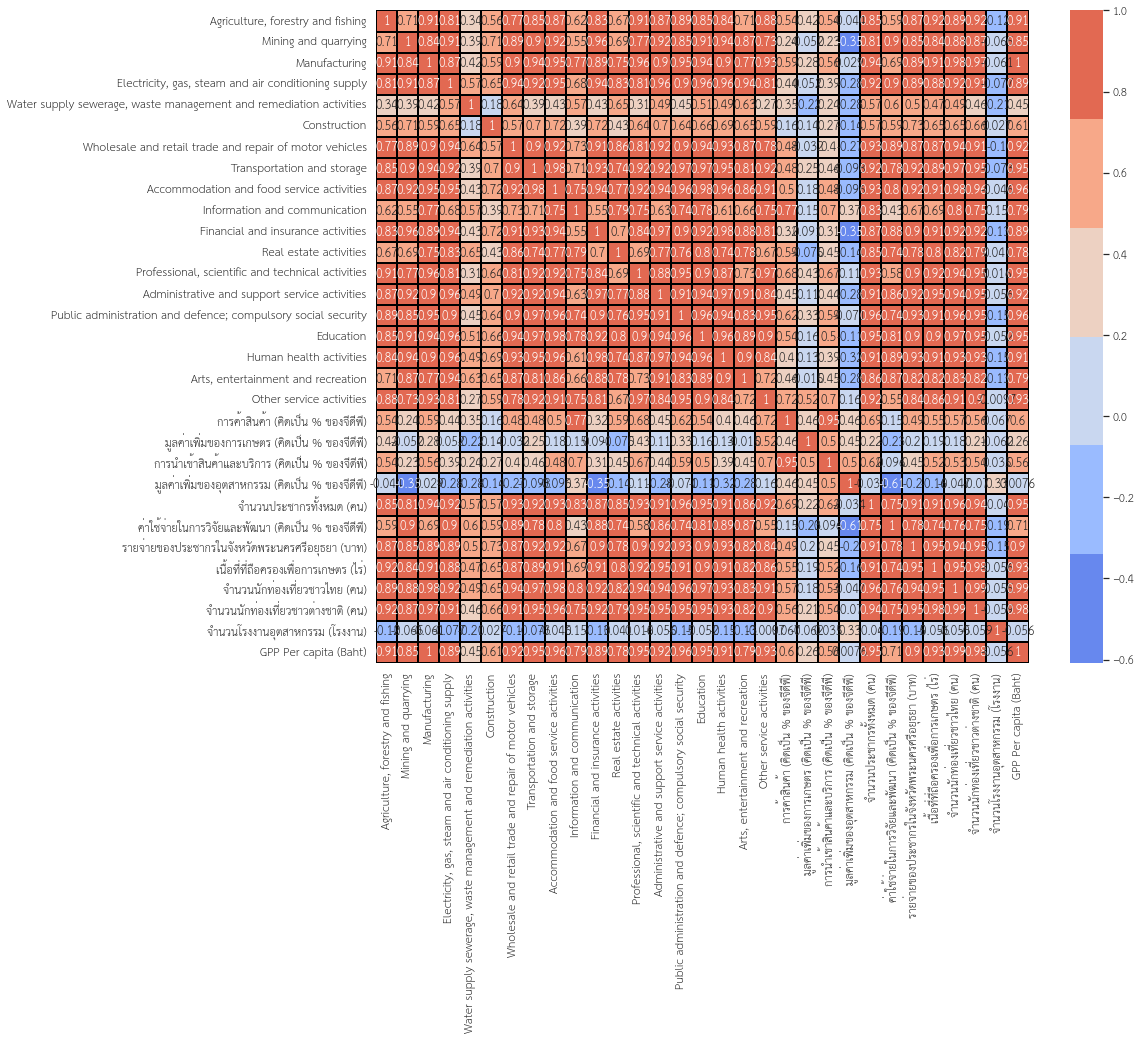

In [82]:
# Plot correlation of numerical data
df3 = df.copy()
plt.figure(figsize=(15,12))
sns.heatmap(df3.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)